In [2]:
import pandas as pd

In [4]:
df = pd.read_csv(r"D:\house_price_pred.csv")

In [5]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
date             4600 non-null object
price            4600 non-null float64
bedrooms         4600 non-null int64
bathrooms        4600 non-null float64
sqft_living      4600 non-null int64
sqft_lot         4600 non-null int64
floors           4600 non-null float64
waterfront       4600 non-null int64
view             4600 non-null int64
condition        4600 non-null int64
sqft_above       4600 non-null int64
sqft_basement    4600 non-null int64
yr_built         4600 non-null int64
yr_renovated     4600 non-null int64
street           4600 non-null object
city             4600 non-null object
statezip         4600 non-null object
country          4600 non-null object
dtypes: float64(3), int64(10), object(5)
memory usage: 647.0+ KB


In [7]:
df["waterfront"].value_counts()

0    4567
1      33
Name: waterfront, dtype: int64

In [8]:
df["condition"].value_counts()

3    2875
4    1252
5     435
2      32
1       6
Name: condition, dtype: int64

In [10]:
#df["yr_renovated"].value_counts()

In [11]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


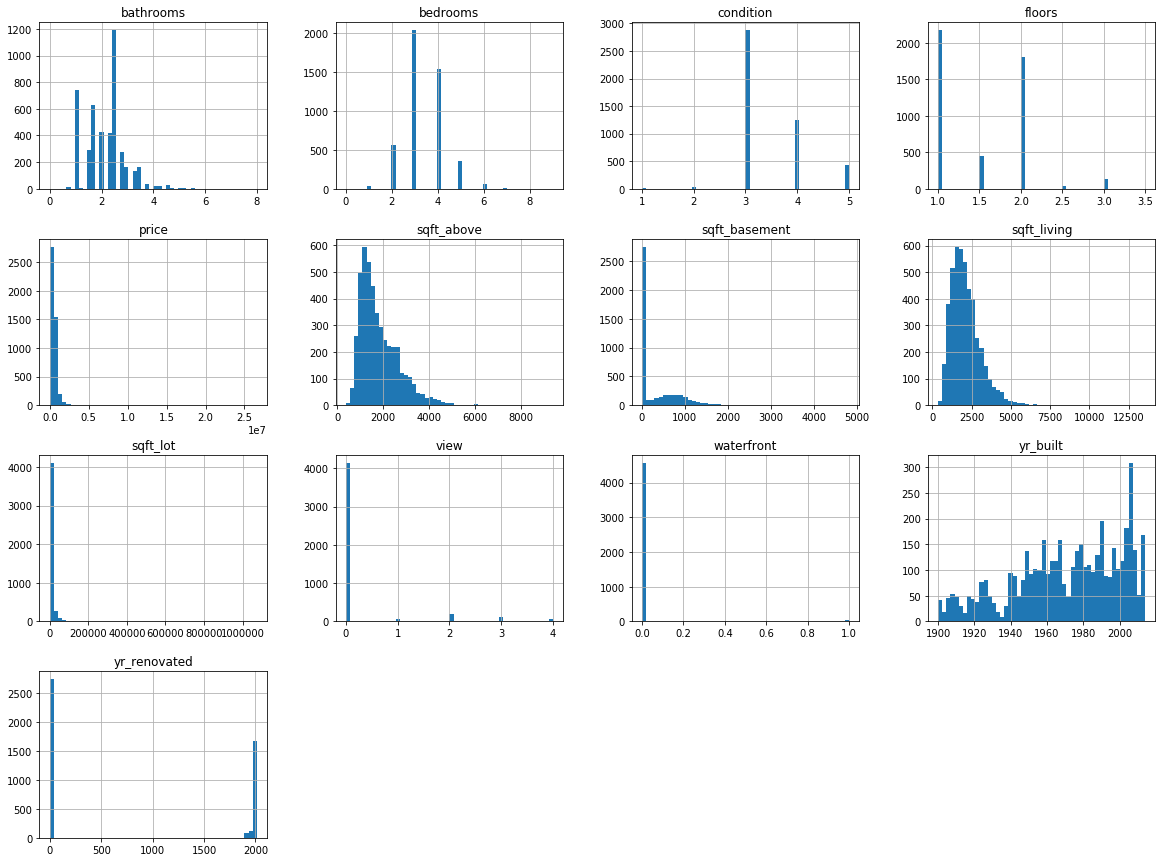

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

In [14]:
import numpy as np

In [16]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [17]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [18]:
train_set, test_set = split_train_test(df, 0.2)
len(train_set)

3680

In [19]:
len(test_set)

920

In [20]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [21]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [22]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [24]:
#df_with_id = df.reset_index()   # adds an `index` column
#train_set, test_set = split_train_test_by_id(df_with_id, 0.2, "index")

In [25]:
test_set.head()

,index,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4,4,02-05-2014 00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,5,02-05-2014 00:00,490000.0,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
11,11,02-05-2014 00:00,1400000.0,4,2.50,2920,4000,1.5,0,0,5,1910,1010,1909,1988,3838-4098 44th Ave NE,Seattle,WA 98105,USA
20,20,02-05-2014 00:00,750000.0,3,1.75,2240,10578,2.0,0,0,5,1550,690,1923,0,3225 NE 92nd St,Seattle,WA 98115,USA
23,23,02-05-2014 00:00,612500.0,4,2.50,2730,12261,2.0,0,0,3,2730,0,1991,0,10212 NE 156th Pl,Bothell,WA 98011,USA


In [26]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [27]:
test_set.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3683,30-06-2014 00:00,544000.0,3,2.50,1460,1613,2.0,0,0,3,1180,280,2007,0,6710 Alonzo Ave NW,Seattle,WA 98117,USA
4411,22-05-2014 00:00,0.0,5,2.25,2000,7900,1.0,0,0,4,1300,700,1986,0,3202 S 194th St,SeaTac,WA 98188,USA
2584,16-06-2014 00:00,1712500.0,3,3.25,2940,5432,3.0,0,3,4,2440,500,1978,2000,150 Highland Dr,Seattle,WA 98109,USA
69,04-05-2014 00:00,365000.0,3,2.50,2200,7350,1.0,0,0,5,1570,630,1988,0,13420 SE 182nd St,Renton,WA 98058,USA
1844,04-06-2014 00:00,275000.0,3,2.50,1720,8755,1.0,0,0,3,1000,720,1983,2009,31607 45th Pl SW,Federal Way,WA 98023,USA


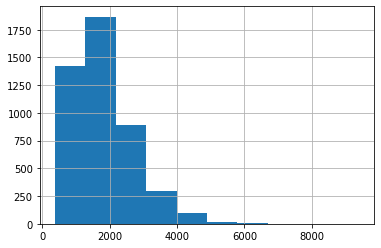

In [28]:
df["sqft_above"].hist()

In [31]:
#Visuaize the data 
df_train = train_set.copy()

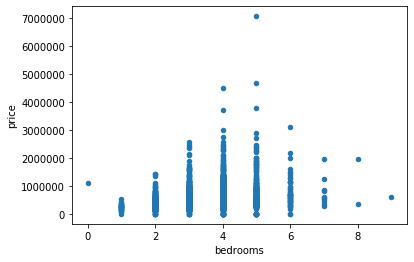

In [33]:
df_train.plot(kind="scatter", x="bedrooms", y="price")

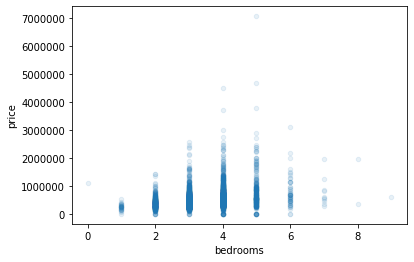

In [34]:
df_train.plot(kind="scatter", x="bedrooms", y="price", alpha=0.1)

In [35]:
corr_matrix = df_train.corr()

In [36]:
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.679567
sqft_above       0.576975
bathrooms        0.503323
view             0.359010
sqft_basement    0.335466
bedrooms         0.313703
floors           0.254857
waterfront       0.222845
sqft_lot         0.076779
condition        0.042261
yr_built         0.031954
yr_renovated    -0.032835
Name: price, dtype: float64

In [37]:
#Prepare the data for modeling
data_model = df_train.drop("price", axis=1) # drop labels for training set
data_model_labels = df_train["price"].copy()

In [38]:
sample_incomplete_rows = df[df.isnull().any(axis=1)].head()
sample_incomplete_rows

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


In [39]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")